In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [5]:
iris = pd.read_excel("Iris.xls")
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   iris         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris.head()

,sepallength,sepalwidth,petallength,petalwidth,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


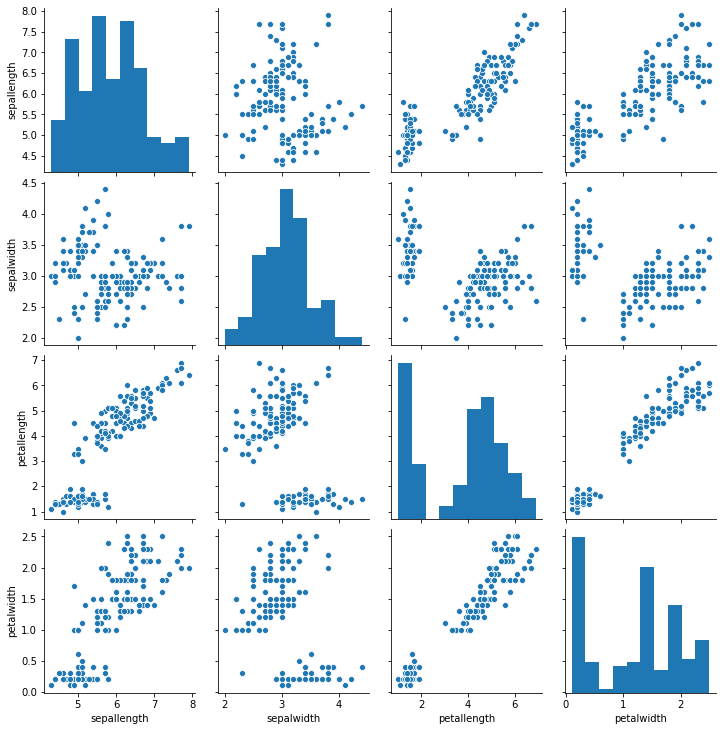

In [7]:
sb.pairplot(iris)
plt.show()

In [12]:
inputs = iris [['sepallength', 'sepalwidth', 'petallength']]
inputs.head()

,sepallength,sepalwidth,petallength
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4


In [9]:
outputs = iris [['petalwidth']]
outputs.head()

,petalwidth
0,0.2
1,0.2
2,0.2
3,0.2
4,0.2


In [17]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [18]:
#chia du lieu
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size = 0.2)


In [19]:
#huan luyen du lieu
reg1  = LinearRegression()
reg1 = reg1.fit(X_train, y_train)

In [20]:
#kiem tra du lieu
y_predict = reg1.predict(X_test)

In [21]:
df = pd.DataFrame({'Actual': pd.DataFrame(y_test.values)[0].values, 
                   'Prediction': pd.DataFrame(y_predict)[0].values})
df.head()

,Actual,Prediction
0,2.1,2.057465
1,2.5,2.111300
2,1.5,1.591240
3,0.1,0.171070
4,2.0,1.812168


In [24]:
m = reg1.coef_[0]
b = reg1.intercept_
print("Coefficients: ", m)
print("Variance score: ", b)

Coefficients:  [-0.23234061  0.22829388  0.53795075]
Variance score:  [-0.15170731]


In [26]:
#the mean square error
print("The mean square error : %.2f" % mean_squared_error(outputs, reg1.predict(inputs)))
print("The variance score: %.2f" % reg1.score(inputs, outputs))

The mean square error : 0.04
The variance score: 0.94


In [27]:
reg1.score(X_train, y_train)

0.943132200182866

In [28]:
reg1.score(X_test, y_test)

0.916470402035068

In [31]:
#diem cua du lieu train va test deu co diem cao, khong chenh lech qua nhieu

In [32]:
y_train_predict  = reg1.predict(X_train)
y_test_predict  = reg1.predict(X_test)

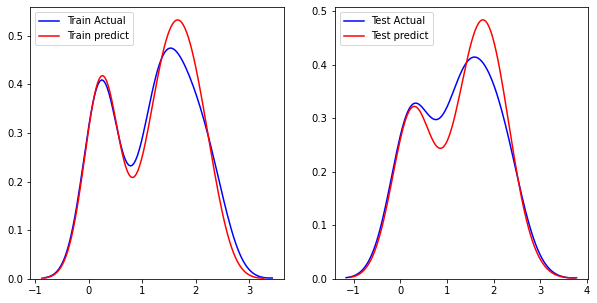

In [33]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
ax1 = sb.distplot(y_train, hist= False, color='b', label = 'Train Actual')
sb.distplot(y_train_predict, hist = False, color='r', label = 'Train predict')
plt.subplot(1,2,2)
ax2 = sb.distplot(y_test, hist= False, color='b', label = 'Test Actual')
sb.distplot(y_test_predict, hist = False, color='r', label = 'Test predict')
plt.legend()
plt.show()

In [34]:
x_now = [[5.2, 3.5, 1.6]]
y_now = reg1.predict(x_now)
print(y_now)

[[0.29987126]]
